In [1]:
import pm4py
log_all = pm4py.read_xes('Road_Traffic_Fine_Management_Process.xes.gz')

c:\Users\Mara Tews\Documents\Uni\RWTH_DataScience\SS_2022\SS2022_ProcessDiscoveryUsingPython\eXdpn\venv\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
parsing log, completed traces :: 100%|██████████| 150370/150370 [01:19<00:00, 1884.07it/s]


In [113]:
last_timestamp = max(event["time:timestamp"] for trace in log_all for event in trace) 
print("Last Timestamp:", last_timestamp)
first_timestamp = min(event["time:timestamp"] for trace in log_all for event in trace)
print("First Timestamp:", first_timestamp) 

time_filtered_log = pm4py.filter_time_range(log_all, "2012-01-01 00:00:00", "2013-06-18 00:00:00", mode='traces_contained')

Last Timestamp: 2013-06-18 00:00:00+02:00
First Timestamp: 2000-01-01 00:00:00+01:00


In [114]:
print(f'activities: {list(pm4py.get_event_attribute_values(time_filtered_log,"concept:name").keys())}')
print("Number of different trace variants: ", len(pm4py.get_variants_as_tuples(time_filtered_log)))

activities: ['Create Fine', 'Send Fine', 'Insert Fine Notification', 'Add penalty', 'Send for Credit Collection', 'Payment', 'Insert Date Appeal to Prefecture', 'Send Appeal to Prefecture', 'Receive Result Appeal from Prefecture', 'Appeal to Judge', 'Notify Result Appeal to Offender']
Number of different trace variants:  40


In [115]:
log_start = pm4py.get_start_activities(time_filtered_log)
print(log_start)

end_activities = pm4py.get_end_activities(time_filtered_log)
print(end_activities)

{'Create Fine': 5558}
{'Send Fine': 1351, 'Send for Credit Collection': 169, 'Payment': 3719, 'Receive Result Appeal from Prefecture': 10, 'Send Appeal to Prefecture': 283, 'Notify Result Appeal to Offender': 26}


In [144]:
# We discard less frequent variants in order to reduce
# the number of edge cases.
log = pm4py.filter_variants_top_k(time_filtered_log, 10)
pm4py.write_xes(log, "Road_Traffic_Fine_Management_Process_filtered.xes")
len(log) 

exporting log, completed traces :: 100%|██████████| 5485/5485 [00:01<00:00, 3624.22it/s]


5485

### Analysis

In [20]:
import pm4py
log = pm4py.read_xes("Road_Traffic_Fine_Management_Process_filtered.xes")

parsing log, completed traces :: 100%|██████████| 10336/10336 [00:07<00:00, 1391.06it/s]


In [117]:
from exdpn.petri_net import get_petri_net
net, im, fm = get_petri_net(log, miner_type='IM')

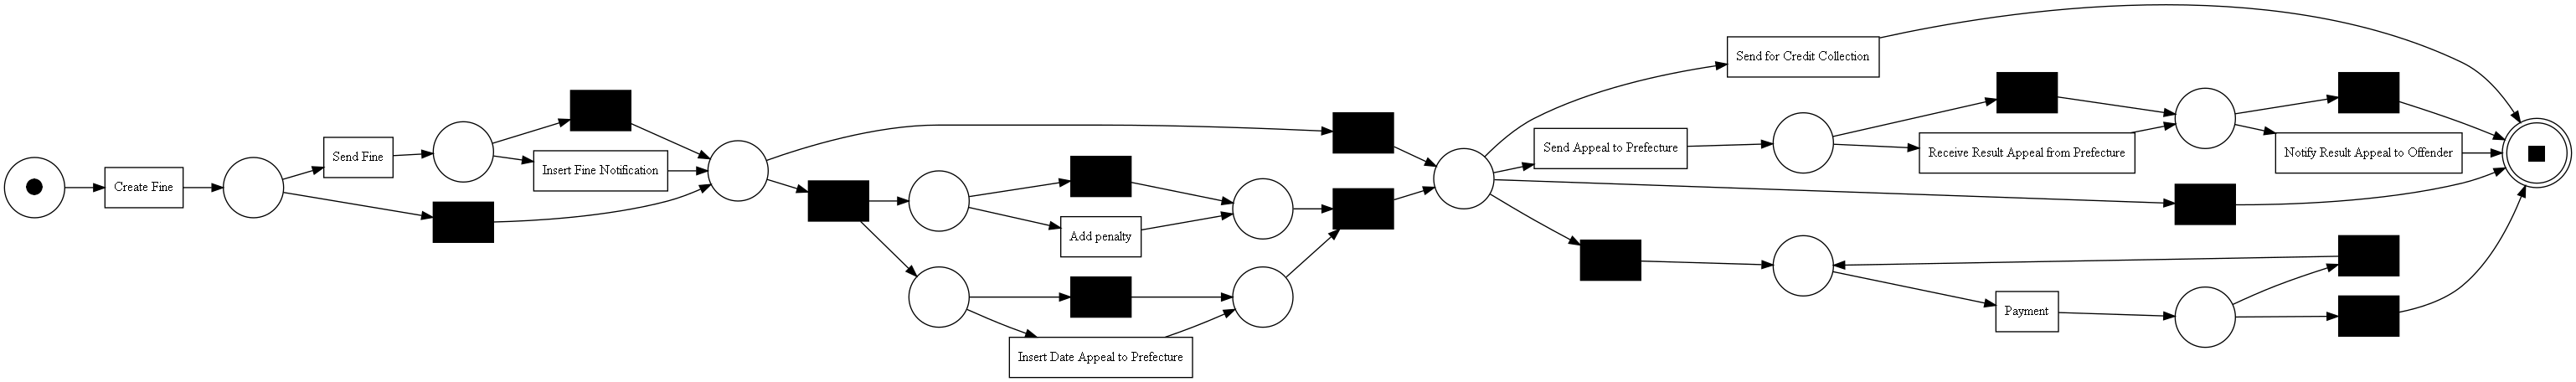

In [118]:
pm4py.view_petri_net(net, im, fm)

In [119]:
event_attrs = list(pm4py.get_event_attributes(log))
trace_attrs = list(pm4py.get_trace_attributes(log))

In [120]:
event_attrs = [attr for attr in event_attrs if max(list(pm4py.get_event_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
event_attrs.remove("time:timestamp")
event_attrs.remove("org:resource")
event_attrs

['dismissal',
 'notificationType',
 'vehicleClass',
 'amount',
 'points',
 'paymentAmount',
 'article',
 'concept:name',
 'totalPaymentAmount',
 'lastSent',
 'expense']

In [121]:
numeric_attributes = ["expense", "expense", "totalPaymentAmount", "points"]

In [122]:
trace_attrs = [attr for attr in trace_attrs if max(list(pm4py.get_trace_attribute_values(log, attr).values())) != 1 and "ID" not in attr]
trace_attrs

[]

### Without hyperparameter:

In [123]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.RF, ML_Technique.SVM, ML_Technique.NN, ML_Technique.XGB]

dpn = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     numeric_attributes=numeric_attributes,
                     ml_list=ml_list, 
                     verbose=True, 
                     impute=True,
                     hyperparameters={ML_Technique.NN: {},
                                      ML_Technique.DT: {},
                                      ML_Technique.LR: {},
                                      ML_Technique.SVM: {},
                                      ML_Technique.RF: {},
                                      ML_Technique.XGB: {}
                                      })

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_3'... Done
-> Evaluating guards at decision point 'p_6'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done
-> Evaluating guards at decision point 'p_7'... Done
-> Evaluating guards at decision point 'p_5'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'p_4'... Done
-> Evaluating guards at decision point 'p_9'... Done
-> Evaluating guards at decision point 'p_12'... Done
-> Evaluating guards at decision point 'p_14'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'p_15'... Done


In [124]:
best = dpn.get_best()

-> Best machine learning technique at decision point 'p_3': Neural Network w/ performance 0.6642605696310225
-> Best machine learning technique at decision point 'p_6': Neural Network w/ performance 0.950063576342058
-> Best machine learning technique at decision point 'p_7': Decision Tree w/ performance 1.0
-> Best machine learning technique at decision point 'p_5': Decision Tree w/ performance 0.8103357892930326
-> Best machine learning technique at decision point 'p_4': Logistic Regression w/ performance 0.9972540938679895
-> Best machine learning technique at decision point 'p_9': Logistic Regression w/ performance 0.9612870169242804
-> Best machine learning technique at decision point 'p_12': Neural Network w/ performance 0.94565143308291
-> Best machine learning technique at decision point 'p_14': Decision Tree w/ performance 0.9485783424077436
-> Best machine learning technique at decision point 'p_15': Logistic Regression w/ performance 1.0


In [125]:
import pandas as pd

res = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn.guard_manager_per_place.items():
    res_row = {"place":dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res = res.append([res_row])

res['place'] = res['place'].apply(str)
res.index = res["place"]
res.drop(["place"], axis=1, inplace=True)
res.dropna(axis=1, how="all", inplace=True)

In [126]:
res.transpose()

place,p_3,p_6,p_7,p_5,p_4,p_9,p_12,p_14,p_15
Decision Tree,0.549370,0.943868,1.0,0.808917,0.994881,0.955200,0.890403,0.948578,0.906036
Logistic Regression,0.544785,0.944833,1.0,0.496936,0.997219,0.956279,0.890403,0.948578,1.000000
Random Forest,0.550529,0.943743,1.0,0.808917,0.994881,0.955200,0.890403,0.948578,1.000000
Support Vector Machine,0.542241,0.944114,1.0,0.471131,0.997219,0.956279,0.890403,0.948578,1.000000
Neural Network,0.620914,0.947226,1.0,0.807675,0.996132,0.956279,0.890818,0.948578,1.000000
XGBoost,0.549622,0.944190,1.0,0.808101,0.997219,0.955200,0.890403,0.948578,1.000000


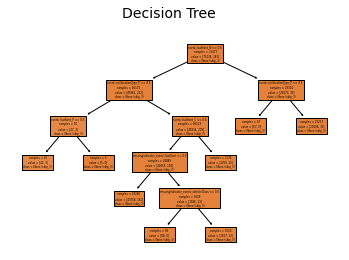

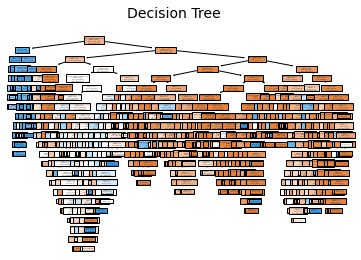

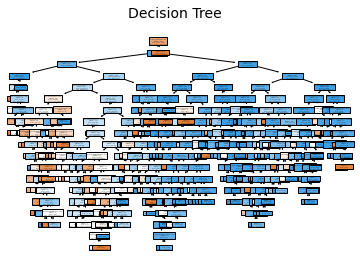

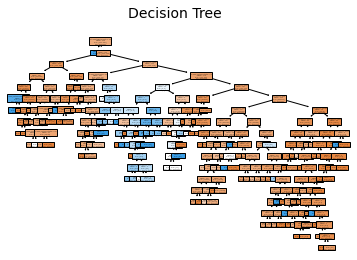

In [16]:
dps = list(dpn.decision_points)
for p in dps:
    dt_guard = dpn.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

### Hyperparameter Selection

In [127]:
from sklearn.model_selection import GridSearchCV
import numpy as np 
from exdpn.petri_net import get_petri_net
from exdpn.guard_datasets import extract_all_datasets
from exdpn.data_preprocessing import basic_data_preprocessing
from exdpn.data_preprocessing.data_preprocessing import apply_ohe, apply_scaling, fit_scaling, fit_ohe
from exdpn.guards import ML_Technique

# prepare data
dp_dataset_map = extract_all_datasets(log= log, net=net, initial_marking=im, final_marking=fm, 
                                      event_level_attributes = event_attrs,
                                      case_level_attributes=trace_attrs)

# decision points 
dps = list(dp_dataset_map.keys())

#### Cross-Validation Decision Tree (with respect to explainablility)

We have observed that decision trees tend to be enormously large without any hyperparameters. We thus try to find an optimal `min_impurity_decrease` value.

In [128]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'min_impurity_decrease':(0, 0.01, 0.05, 0.1, 0.15)}

best_values = {}

for dp in dps:
    X_train, y_train = [], []
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute = True, numeric_attributes = numeric_attributes)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    dt_base = DecisionTreeClassifier()
    dt_grid = GridSearchCV(dt_base, parameters, n_jobs=-1, scoring='f1_weighted')

    dt_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(dt_grid.best_score_,4)}\t {dt_grid.best_params_}")
    best_values[dp] = dt_grid.best_params_['min_impurity_decrease']

min_impurity_decrease = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {min_impurity_decrease}")

p_3:	0.5834	 {'min_impurity_decrease': 0.01}
p_6:	0.9439	 {'min_impurity_decrease': 0}
p_7:	1.0	 {'min_impurity_decrease': 0}
p_5:	0.8089	 {'min_impurity_decrease': 0}
p_4:	0.9972	 {'min_impurity_decrease': 0.01}
p_9:	0.9563	 {'min_impurity_decrease': 0.01}
p_12:	0.9322	 {'min_impurity_decrease': 0.1}
p_14:	0.9486	 {'min_impurity_decrease': 0}
p_15:	1.0	 {'min_impurity_decrease': 0}
final value: 0.020129932243921882


#### Cross-Validaion Neural Network

In [131]:
from sklearn.neural_network import MLPClassifier
parameters = {'hidden_layer_sizes': ((5, ), (5, 5), (10, 10), (5, 10, 5), (10, 20, 10))}

best_values = {}
max_ds_size = -1
max_ds_key = None

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    if len(dp_dataset) > max_ds_size: max_ds_key = dp
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute = True, numeric_attributes = numeric_attributes)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    nn_base = MLPClassifier()
    nn_grid = GridSearchCV(nn_base, parameters, n_jobs=-1, scoring='f1_weighted')

    nn_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(nn_grid.best_score_,4)}\t {nn_grid.best_params_}")
    best_values[dp] = nn_grid.best_params_['hidden_layer_sizes']

hidden_layer_sizes = best_values[max_ds_key]
print(f"final value: {hidden_layer_sizes}")

p_3:	0.6097	 {'hidden_layer_sizes': (10, 10)}


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


p_6:	0.9485	 {'hidden_layer_sizes': (5, 5)}
p_7:	0.9952	 {'hidden_layer_sizes': (10, 20, 10)}
p_5:	0.8077	 {'hidden_layer_sizes': (10, 10)}
p_4:	0.997	 {'hidden_layer_sizes': (10, 10)}
p_9:	0.9563	 {'hidden_layer_sizes': (5,)}
p_12:	0.8906	 {'hidden_layer_sizes': (10, 10)}


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


p_14:	0.9486	 {'hidden_layer_sizes': (5,)}
p_15:	1.0	 {'hidden_layer_sizes': (10, 10)}
final value: (10, 10)


Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


#### Cross-Validation Logistic Regression:

In [132]:
from sklearn.linear_model import LogisticRegression
parameters = {'C': (0.1, 0.25, 0.5)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute = True, numeric_attributes = numeric_attributes)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    lr_base = LogisticRegression()
    lr_grid = GridSearchCV(lr_base, parameters, n_jobs=-1, scoring='f1_weighted')

    lr_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(lr_grid.best_score_,4)}\t {lr_grid.best_params_}")
    best_values[dp] = lr_grid.best_params_['C']

C_lr = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_lr}")

p_3:	0.5448	 {'C': 0.5}
p_6:	0.9448	 {'C': 0.1}
p_7:	1.0	 {'C': 0.25}
p_5:	0.4969	 {'C': 0.1}
p_4:	0.9972	 {'C': 0.1}
p_9:	0.9563	 {'C': 0.1}
p_12:	0.8904	 {'C': 0.1}
p_14:	0.9486	 {'C': 0.1}
p_15:	1.0	 {'C': 0.1}
final value: 0.19298126743722602


#### Cross-Validation SVM:

In [133]:
from sklearn.svm import LinearSVC
parameters = {'C':(0.1, 0.25, 0.5)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute = True, numeric_attributes = numeric_attributes)
    scaler, scaler_columns = fit_scaling(X_train)
    X_train = apply_scaling(X_train, scaler, scaler_columns)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    svm_base = LinearSVC()
    svm_grid = GridSearchCV(svm_base, parameters, n_jobs=-1, scoring='f1_weighted')

    svm_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(svm_grid.best_score_,4)}\t {svm_grid.best_params_}")
    best_values[dp] = svm_grid.best_params_['C']

C_svm = sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys())
print(f"final value: {C_svm}")

p_3:	0.5448	 {'C': 0.1}


Liblinear failed to converge, increase the number of iterations.


p_6:	0.9448	 {'C': 0.5}
p_7:	1.0	 {'C': 0.1}
p_5:	0.4969	 {'C': 0.1}
p_4:	0.9972	 {'C': 0.1}
p_9:	0.9563	 {'C': 0.1}
p_12:	0.8904	 {'C': 0.1}
p_14:	0.9486	 {'C': 0.1}
p_15:	1.0	 {'C': 0.1}
final value: 0.18744519728975687


#### Cross-Validation XGBoost:

In [134]:
from xgboost import XGBClassifier
parameters = {'max_depth': (1, 2, 3, 5, 10)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute = True, numeric_attributes = numeric_attributes)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    xgb_base = XGBClassifier()
    xgb_grid = GridSearchCV(xgb_base, parameters, n_jobs=-1, scoring='f1_weighted')

    xgb_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(xgb_grid.best_score_,4)}\t {xgb_grid.best_params_}")
    best_values[dp] = xgb_grid.best_params_['max_depth']

max_depth_xgb = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {max_depth_xgb}")

p_3:	0.5559	 {'max_depth': 1}
p_6:	0.9474	 {'max_depth': 1}
p_7:	1.0	 {'max_depth': 1}
p_5:	0.8081	 {'max_depth': 2}
p_4:	0.9972	 {'max_depth': 1}
p_9:	0.9563	 {'max_depth': 1}
p_12:	0.8904	 {'max_depth': 1}
p_14:	0.9486	 {'max_depth': 1}
p_15:	1.0	 {'max_depth': 1}
final value: 1


#### Cross-Validation Random Forest:

In [135]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators': (10, 20, 50, 100)}

best_values = {}

for dp in dps:
    dp_dataset = dp_dataset_map[dp]
    X_train, y_train = basic_data_preprocessing(dp_dataset, impute = True, numeric_attributes = numeric_attributes)
    ohe = fit_ohe(X_train)
    X_train = apply_ohe(X_train, ohe)
    transition_int_map = {transition: index for index,
                          transition in enumerate(list(set(y_train)))}
    y_train_mapped = [transition_int_map[transition] for transition in y_train]

    rf_base = RandomForestClassifier()
    rf_grid = GridSearchCV(rf_base, parameters, n_jobs=-1, scoring='f1_weighted')

    rf_grid.fit(X_train, y_train_mapped)
    print(f"{dp}:\t{round(rf_grid.best_score_,4)}\t {rf_grid.best_params_}")
    best_values[dp] = rf_grid.best_params_['n_estimators']

n_estimators = round(sum(val * len(dp_dataset_map[key]) for key,val in best_values.items())/sum(len(dp_dataset_map[key]) for key in best_values.keys()))
print(f"final value: {n_estimators}")

p_3:	0.5575	 {'n_estimators': 10}
p_6:	0.9441	 {'n_estimators': 10}
p_7:	1.0	 {'n_estimators': 10}
p_5:	0.8089	 {'n_estimators': 10}
p_4:	0.9972	 {'n_estimators': 20}
p_9:	0.9552	 {'n_estimators': 100}
p_12:	0.8904	 {'n_estimators': 10}
p_14:	0.9486	 {'n_estimators': 10}
p_15:	1.0	 {'n_estimators': 10}
final value: 16


### With hyperparameter:

In [136]:
from exdpn.data_petri_net import Data_Petri_Net
from exdpn.guards import ML_Technique

ml_list = [ML_Technique.DT, ML_Technique.LR, ML_Technique.NN, ML_Technique.SVM, ML_Technique.RF, ML_Technique.XGB]

dpn_hp = Data_Petri_Net(log, petri_net=net, initial_marking=im, final_marking=fm,
                     event_level_attributes=event_attrs,
                     case_level_attributes=trace_attrs,
                     numeric_attributes = numeric_attributes,
                     ml_list=ml_list, 
                     verbose=True, 
                     impute=True,
                     CV_splits = 5,
                     hyperparameters = {ML_Technique.NN: {'hidden_layer_sizes': hidden_layer_sizes}, 
                                        ML_Technique.DT: {'min_impurity_decrease': min_impurity_decrease},
                                        ML_Technique.LR: {"C": C_lr},
                                        ML_Technique.SVM: {"C": C_svm},
                                        ML_Technique.XGB: {"max_depth": max_depth_xgb},
                                        ML_Technique.RF: {'n_estimators': n_estimators,
                                                         'min_impurity_decrease': min_impurity_decrease}})

-> Mining guard datasets... Done
-> Evaluating guards at decision point 'p_3'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'p_6'... 

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the doc

Done
-> Evaluating guards at decision point 'p_7'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'p_5'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'p_4'... Done
-> Evaluating guards at decision point 'p_9'... Done
-> Evaluating guards at decision point 'p_12'... Done
-> Evaluating guards at decision point 'p_14'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done
-> Evaluating guards at decision point 'p_15'... 

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.


Done


In [137]:
best_hp = dpn_hp.get_best()

-> Best machine learning technique at decision point 'p_3': Neural Network w/ performance 0.6579928172282541
-> Best machine learning technique at decision point 'p_6': Neural Network w/ performance 0.9482714935660281
-> Best machine learning technique at decision point 'p_7': Support Vector Machine w/ performance 1.0
-> Best machine learning technique at decision point 'p_5': Decision Tree w/ performance 0.8082567645195979
-> Best machine learning technique at decision point 'p_4': Decision Tree w/ performance 0.9972540938679895
-> Best machine learning technique at decision point 'p_9': Decision Tree w/ performance 0.9612870169242804
-> Best machine learning technique at decision point 'p_12': Decision Tree w/ performance 0.94565143308291
-> Best machine learning technique at decision point 'p_14': Decision Tree w/ performance 0.9485783424077436
-> Best machine learning technique at decision point 'p_15': Decision Tree w/ performance 1.0


In [138]:
res_hp = pd.DataFrame(columns=["place"] + [str(ml_t for ml_t in ml_list)])

for dp,gm in dpn_hp.guard_manager_per_place.items():
    res_row = {"place": dp} | {str(ml_t):gm.f1_mean_test[ml_t] for ml_t in gm.guards_list.keys()}
    res_hp = res_hp.append([res_row])
    
res_hp['place'] = res_hp['place'].apply(str)
res_hp.index = res_hp["place"]
res_hp.drop(["place"], axis=1, inplace=True)
res_hp.dropna(axis=1, how="all", inplace=True)

res_hp.transpose()

place,p_3,p_6,p_7,p_5,p_4,p_9,p_12,p_14,p_15
Decision Tree,0.505967,0.940769,0.975768,0.807675,0.997219,0.956279,0.890403,0.948578,1.0
Logistic Regression,0.543909,0.944833,0.980620,0.496936,0.997219,0.956279,0.890403,0.948578,1.0
Neural Network,0.595798,0.948344,0.995148,0.807675,0.996312,0.956279,0.890403,0.948578,1.0
Support Vector Machine,0.542368,0.944114,1.000000,0.471131,0.997219,0.956279,0.890403,0.948578,1.0
Random Forest,0.497736,0.940976,0.975768,0.807675,0.997219,0.956279,0.890403,0.948578,1.0
XGBoost,0.555948,0.947369,1.000000,0.807675,0.997219,0.956279,0.890403,0.948578,1.0


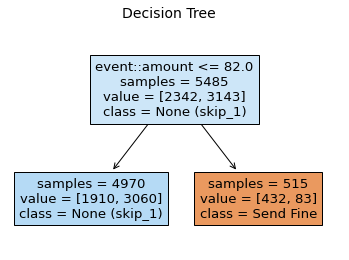

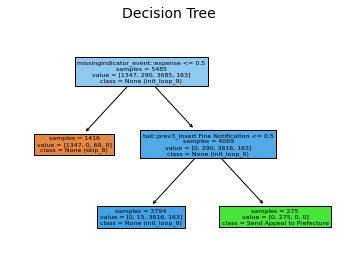

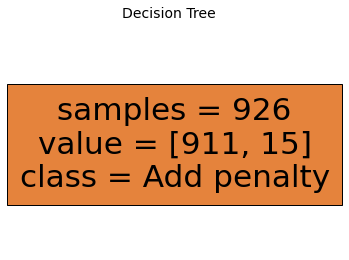

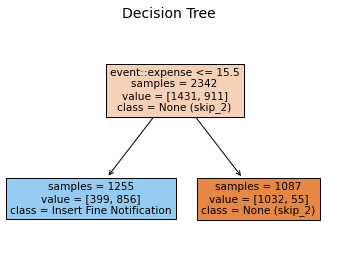

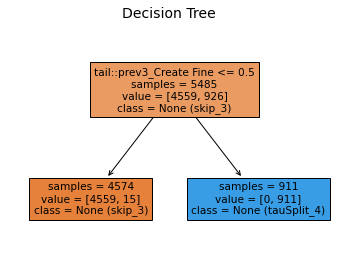

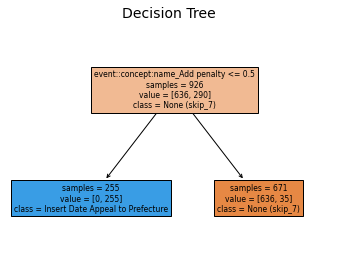

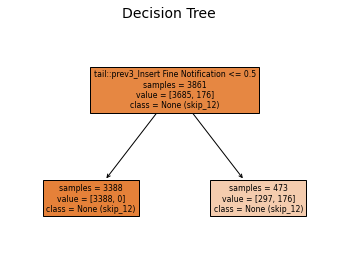

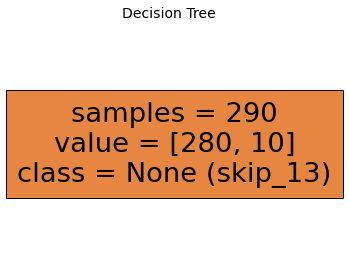

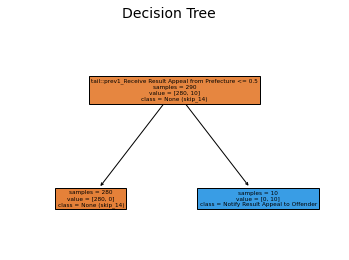

In [139]:
dps_hp = list(dpn_hp.decision_points)
for p in dps_hp:
    dt_guard = dpn_hp.guard_manager_per_place[p].guards_list[ML_Technique.DT]
    dt_explainable_representation = dt_guard.get_explainable_representation()

#### Summary:

In [140]:
res.transpose()

place,p_3,p_6,p_7,p_5,p_4,p_9,p_12,p_14,p_15
Decision Tree,0.549370,0.943868,1.0,0.808917,0.994881,0.955200,0.890403,0.948578,0.906036
Logistic Regression,0.544785,0.944833,1.0,0.496936,0.997219,0.956279,0.890403,0.948578,1.000000
Random Forest,0.550529,0.943743,1.0,0.808917,0.994881,0.955200,0.890403,0.948578,1.000000
Support Vector Machine,0.542241,0.944114,1.0,0.471131,0.997219,0.956279,0.890403,0.948578,1.000000
Neural Network,0.620914,0.947226,1.0,0.807675,0.996132,0.956279,0.890818,0.948578,1.000000
XGBoost,0.549622,0.944190,1.0,0.808101,0.997219,0.955200,0.890403,0.948578,1.000000


In [141]:
res_hp.transpose()

place,p_3,p_6,p_7,p_5,p_4,p_9,p_12,p_14,p_15
Decision Tree,0.505967,0.940769,0.975768,0.807675,0.997219,0.956279,0.890403,0.948578,1.0
Logistic Regression,0.543909,0.944833,0.980620,0.496936,0.997219,0.956279,0.890403,0.948578,1.0
Neural Network,0.595798,0.948344,0.995148,0.807675,0.996312,0.956279,0.890403,0.948578,1.0
Support Vector Machine,0.542368,0.944114,1.000000,0.471131,0.997219,0.956279,0.890403,0.948578,1.0
Random Forest,0.497736,0.940976,0.975768,0.807675,0.997219,0.956279,0.890403,0.948578,1.0
XGBoost,0.555948,0.947369,1.000000,0.807675,0.997219,0.956279,0.890403,0.948578,1.0
